In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df_clustered = pd.read_csv('../data/Full_data_clustered.csv', sep=',')
X_clustered = pd.read_csv('../data/Clean_feature_clustered.csv', sep=',')

In [34]:
cluster_summary = X_clustered.groupby('cluster').mean().round(2)

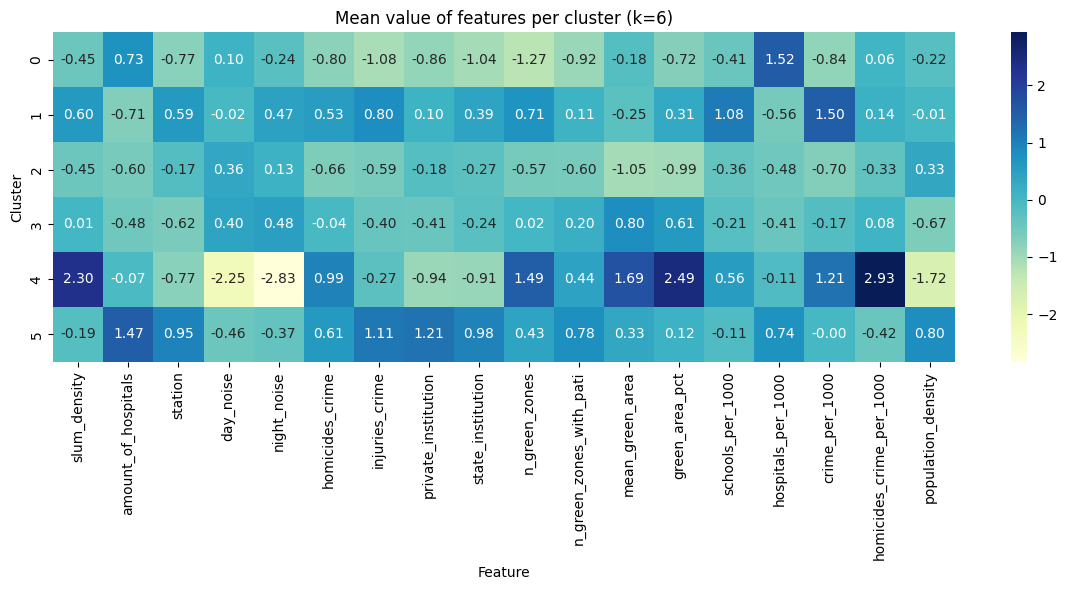

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Mean value of features per cluster (k=6)")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

Let's increase the readability of the output

In [39]:
positive_features = [
    'amount_of_hospitals',
    'station',
    'private_institution',
    'state_institution',
    'n_green_zones',
    'n_green_zones_with_pati',
    'mean_green_area',
    'green_area_pct',
    'schools_per_1000',
    'hospitals_per_1000'
]

negative_features = [
    'slum_density',
    'day_noise',
    'night_noise',
    'homicides_crime',
    'injuries_crime',
    'crime_per_1000',
    'homicides_crime_per_1000',
    'population_density'
]

ordered_features = positive_features + negative_features
cluster_summary_ordered = cluster_summary[ordered_features]

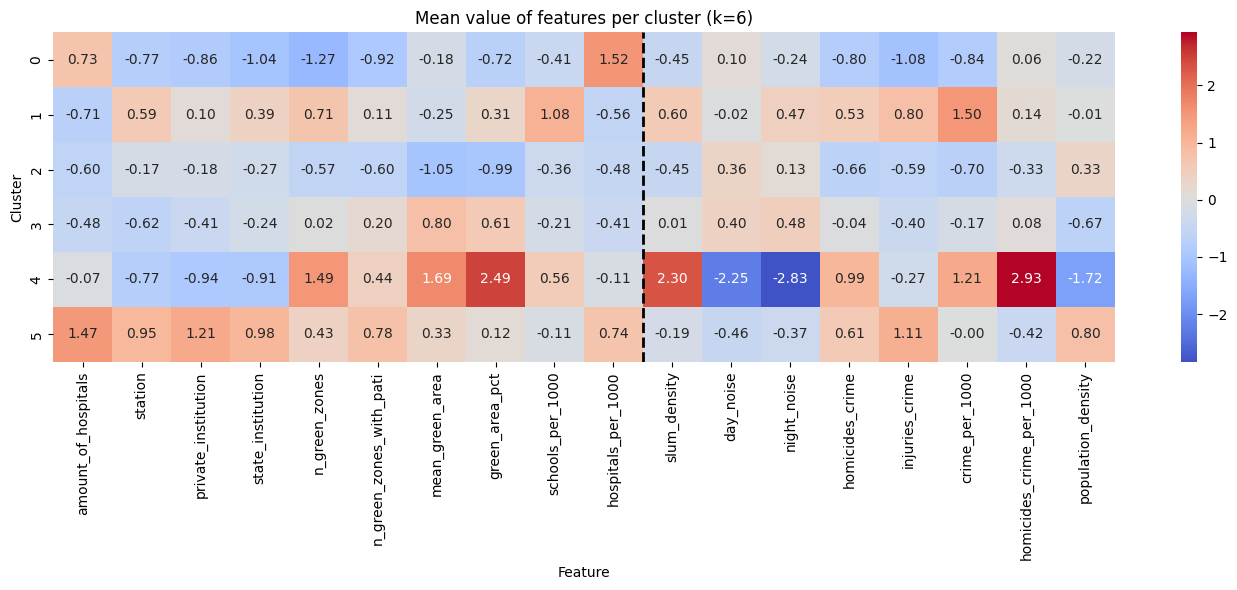

In [40]:
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_summary_ordered, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.axvline(x=len(positive_features), color='black', linestyle='--', lw=2)
plt.title("Mean value of features per cluster (k=6)")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

The dotted line separates positive and negative signs.

## Let's start with the visualization on map

In [41]:
import geopandas as gpd
from shapely import wkt

df_clustered['geometry'] = df_clustered['geometry'].apply(wkt.loads)
df_clustered = gpd.GeoDataFrame(df_clustered, geometry='geometry', crs='EPSG:4326')
df_clustered.head(2)

,neighborhood,commune,perimeter_neib,area_neib,geometry,population,slum,amount_of_hospitals,station,day_noise,...,green_area_pct,schools_per_1000,hospitals_per_1000,green_area_per_1000,crime_per_1000,homicides_crime_per_1000,property_crime_per_1000,population_density,slum_density,cluster
0,AGRONOMIA,15,6556.17,2122169.34,"POLYGON ((-58.47589 -34.59172, -58.47598 -34.5...",-1.551111,0.0,-0.710738,-0.767221,-1.141405,...,-1.484560,1.228490,-0.556520,-1.072101,-0.995424,-0.811509,-0.920963,-1.220827,-0.449078,2
1,ALMAGRO,5,8537.90,4050752.25,"POLYGON ((-58.416 -34.59785, -58.41569 -34.597...",1.400821,0.0,0.578137,1.351309,-0.426024,...,-1.411452,-0.034185,-0.233871,-1.831769,-0.399106,-0.503767,-0.264588,2.806393,-0.449078,5


In [42]:
# Colors in hex codes 
cluster_colors = {
0: '#FF0000', # bright red
1: '#654321', # dark brown
2: '#FFFF00', # yellow
3: '#228B22', # deep green
4: '#ADD8E6', # light blue
5: '#0000FF'  # blue
}

In [43]:
df_clustered['color'] = df_clustered['cluster'].map(cluster_colors)

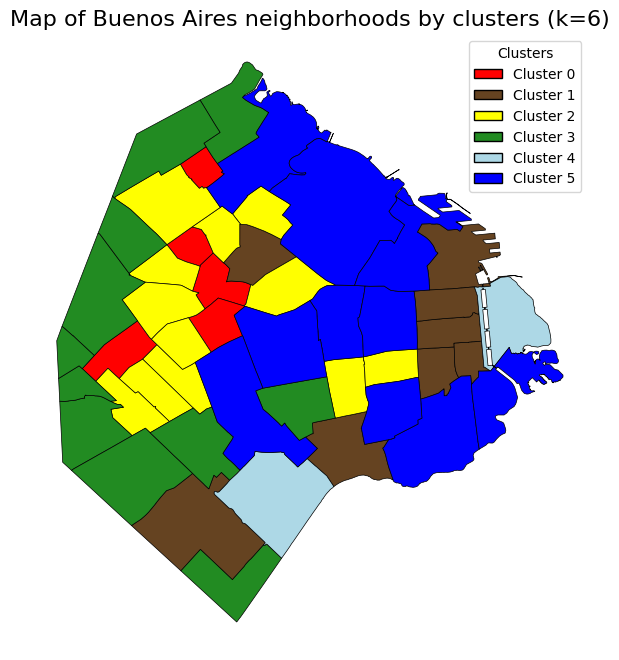

In [82]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=f'Cluster {cluster}')
    for cluster, color in cluster_colors.items()
]

fig, ax = plt.subplots(figsize=(12, 8))

for cluster_id, color in cluster_colors.items():
    df_clustered[df_clustered['cluster'] == cluster_id].plot(
        ax=ax,
        color=color,
        edgecolor='black',
        linewidth=0.5
    )

# Добавим легенду
ax.legend(handles=legend_elements, title='Clusters')
ax.set_title("Map of Buenos Aires neighborhoods by clusters (k=6)", fontsize=16)
ax.axis('off')
plt.show()

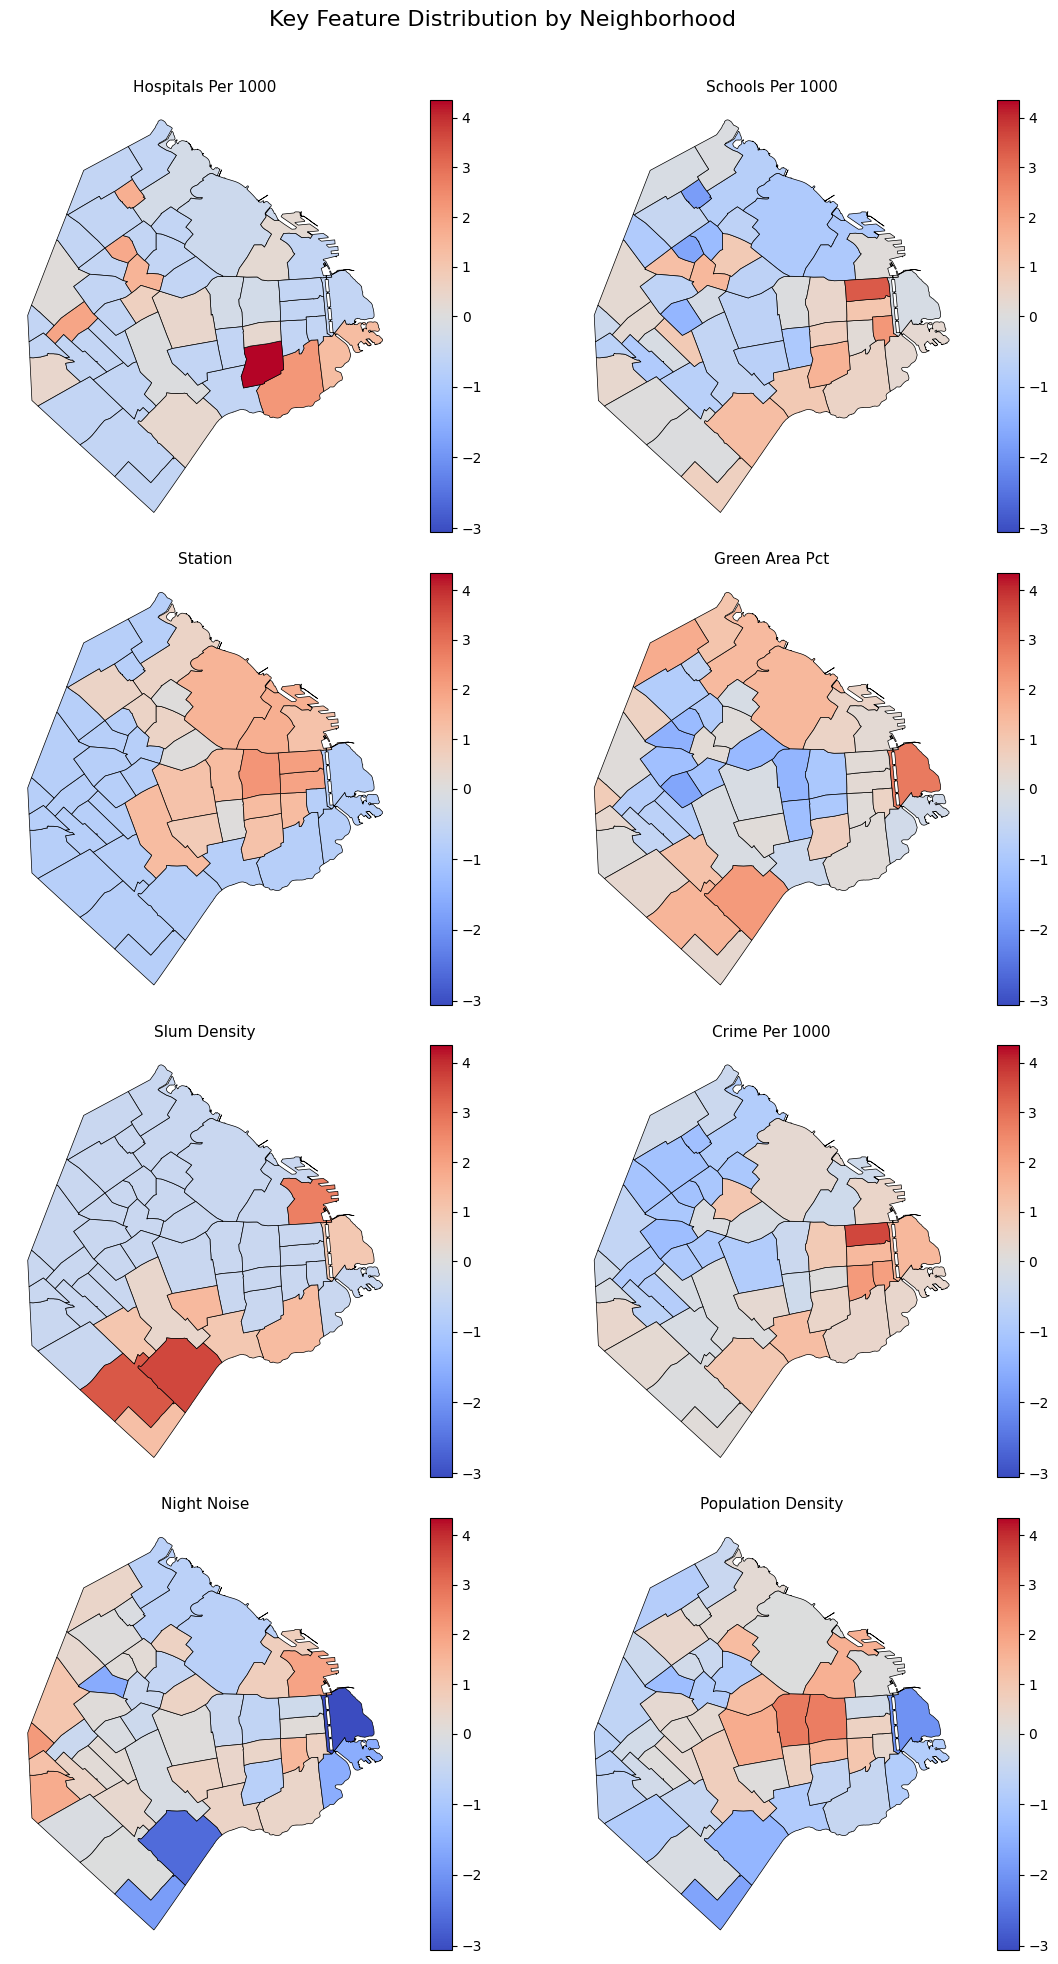

In [86]:
import matplotlib.colors as mcolors
features = [
    'hospitals_per_1000', 'schools_per_1000', 'station', 'green_area_pct', 
    'slum_density', 'crime_per_1000', 'night_noise', 'population_density' 
]

# --- Построение сабграфиков 4x2 ---
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

vmin = min(df_clustered[feature].min() for feature in features)
vmax = max(df_clustered[feature].max() for feature in features)
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = 'coolwarm'

for idx, feature in enumerate(features):
    ax = axes[idx]
    df_clustered.plot(column=feature, cmap=cmap, linewidth=0.5, ax=ax,
                      edgecolor='black', legend=True, norm=norm)
    ax.set_title(f"{feature.replace('_', ' ').title()}", fontsize=11)
    ax.axis('off')

# Удалим лишнюю пустую ось
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Key Feature Distribution by Neighborhood", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Let's try to mark up several areas manually

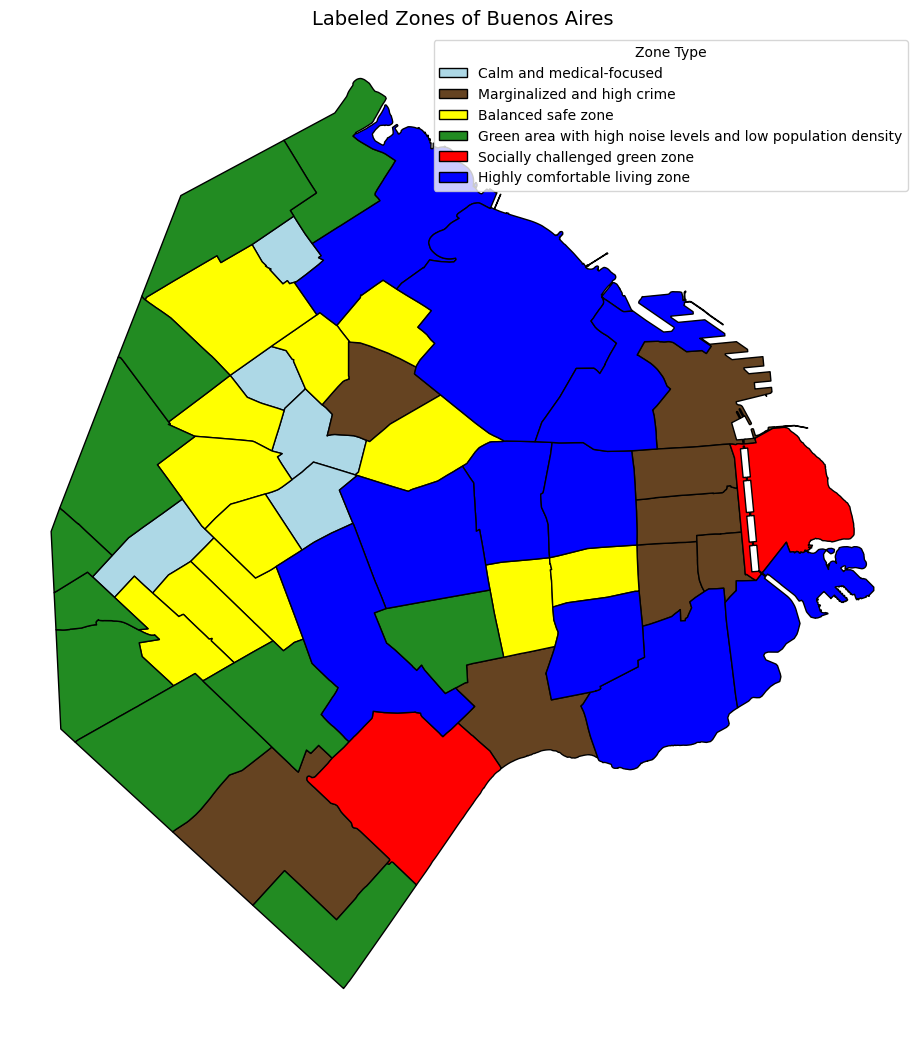

In [83]:
cluster_to_label = {
	0: "Calm and medical-focused",
	1: "Marginalized and high crime",
	2: "Balanced safe zone",
	3: "Green area with high noise levels and low population density",
	4: "Socially challenged green zone",
	5: "Highly comfortable living zone"
}
df_clustered['label'] = df_clustered['cluster'].map(cluster_to_label)

label_colors = {
    "Calm and medical-focused": '#ADD8E6', # light blue
    "Marginalized and high crime": '#654321', # dark brown
    "Balanced safe zone": '#FFFF00', # yellow
    "Green area with high noise levels and low population density": '#228B22', # deep green
    "Socially challenged green zone": '#FF0000', # bright red 
    "Highly comfortable living zone": '#0000FF'  # blue
}
df_clustered['color'] = df_clustered['label'].map(label_colors)

# Визуализация
fig, ax = plt.subplots(figsize=(16, 13))
for label, color in label_colors.items():
    df_clustered[df_clustered['label'] == label].plot(ax=ax, color=color, edgecolor='black')

legend_elements = [Patch(facecolor=color, edgecolor='black', label=label) for label, color in label_colors.items()]
ax.legend(handles=legend_elements, title="Zone Type")
ax.set_title("Labeled Zones of Buenos Aires", fontsize=14)
ax.axis('off')
plt.show()

Let's create a Folium map

In [102]:
import folium
import geopandas as gpd
from branca.colormap import linear

# Убедись, что crs = EPSG:4326
df_clustered = df_clustered.to_crs(epsg=4326)

# Создаем карту, центрируем на BA
m = folium.Map(location=[-34.6, -58.45], zoom_start=11, tiles="cartodbpositron")

# Уникальные лейблы и цвета
unique_labels = df_clustered['label'].unique()
label_colors = {
    "Calm and medical-focused": '#ADD8E6', # light blue
    "Marginalized and high crime": '#654321', # dark brown
    "Balanced safe zone": '#FFFF00', # yellow
    "Green area with high noise levels and low population density": '#228B22', # deep green
    "Socially challenged green zone": '#FF0000', # bright red 
    "Highly comfortable living zone": '#0000FF'  # blue
    }

def popup_html(row):
    html = f"""
    <div style="font-family:Arial,sans-serif; font-size:13px; line-height:1.4">
        <b style="font-size:14px">{row['neighborhood'].upper()}</b><br>
        <b>Zone:</b> {row['label']}<br><br>
        <table style="width:100%; font-size:12px;">
          <tr><td><b>Crime per 1000:</b></td><td>{row.get('crime_per_1000', 'n/a')}</td></tr>
          <tr><td><b>Slum density:</b></td><td>{row.get('slum_density', 'n/a')}</td></tr>
          <tr><td><b>Night noise:</b></td><td>{row.get('night_noise', 'n/a')}</td></tr>
          <tr><td><b>Green area %:</b></td><td>{row.get('green_area_pct', 'n/a')}</td></tr>
          <tr><td><b>Hospitals / 1000:</b></td><td>{row.get('hospitals_per_1000', 'n/a')}</td></tr>
          <tr><td><b>Schools / 1000:</b></td><td>{row.get('schools_per_1000', 'n/a')}</td></tr>
        </table>
    </div>
    """
    return html

for _, row in df_clustered.iterrows():
    sim_geo = gpd.GeoSeries([row['geometry']]).simplify(0.001)
    geo_json = sim_geo.to_json()
    color = label_colors.get(row['label'], "#cccccc")

    gj = folium.GeoJson(
        data=geo_json,
        style_function=lambda feature, color=color: {
            'fillColor': color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.Tooltip(row['neighborhood']),
        popup=folium.Popup(popup_html(row), max_width=300)
    )
    gj.add_to(m)


legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 250px; height: auto; 
     background-color: white; z-index:9999; padding: 10px; border:1px solid #ccc;">
     <b>Zone Types</b><br>
"""
for label, color in label_colors.items():
    legend_html += f'<i style="background:{color};width:20px;height:10px;display:inline-block;"></i> {label}<br>'
legend_html += "</div>"
m.get_root().html.add_child(folium.Element(legend_html))

# Сохраняем
m.save("../outputs/buenos_aires_zones_map.html")
